# Saudi Arabia National Football Match Results

## Defining the problem statment
<small>
In this project, we analyze tabular data on Saudi Arabia National Football Match Results (2000–2025) using Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn.



We explore key columns like match outcomes, goals scored/conceded, penalties, home/away status, tournaments, and time trends to uncover patterns and correlations.

The goal is to identify influential factors—such as home advantage, tournament type, goal sources, and temporal changes—that explain performance variations, helping understand the team's historical strengths, weaknesses, and evolution for better strategic insights into Saudi Arabia's international football results.
</small>

## Collecting the data

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

df_goals= pd.read_csv('goalscorers.csv')
df_results=pd.read_csv('results.csv')


In [3]:
sa = 'Saudi Arabia'


In [4]:
# Filter the dataset to include only matches where Saudi Arabia played
df_saudi_results=df_results[(df_results['home_team']== sa)|(df_results['away_team']== sa)]
df_saudi_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
5958,1963-11-18,Egypt,Saudi Arabia,7,0,Friendly,Jakarta,Indonesia,True
7250,1967-12-10,Saudi Arabia,Tunisia,4,0,Friendly,Riyadh,Saudi Arabia,False
7590,1969-01-17,Saudi Arabia,Turkey,1,2,Friendly,Riyadh,Saudi Arabia,False
8006,1970-03-28,Saudi Arabia,Kuwait,1,3,Gulf Cup,Isa Town,Bahrain,True
8007,1970-03-30,Bahrain,Saudi Arabia,0,0,Gulf Cup,Isa Town,Bahrain,False
...,...,...,...,...,...,...,...,...,...
48863,2025-12-02,Saudi Arabia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True
48871,2025-12-05,Comoros,Saudi Arabia,1,3,Arab Cup,Al Khor,Qatar,True
48878,2025-12-08,Morocco,Saudi Arabia,1,0,Arab Cup,Lusail,Qatar,True
48885,2025-12-11,Palestine,Saudi Arabia,1,2,Arab Cup,Lusail,Qatar,True


In [5]:
df_saudi_goals   = df_goals[(df_goals['team'] == sa) | (df_goals['home_team'] == sa) | (df_goals['away_team'] == sa)]
df_saudi_goals

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
7672,1976-11-12,Saudi Arabia,Syria,Saudi Arabia,Samir Sultan Al Fahad,22.0,False,False
7673,1976-11-12,Saudi Arabia,Syria,Saudi Arabia,Saoud Al Gassem Mohammed Bo Saeed,54.0,False,False
7685,1976-11-26,Syria,Saudi Arabia,Syria,Abdul Hamid Al Katbi,36.0,False,False
7686,1976-11-26,Syria,Saudi Arabia,Saudi Arabia,Mohammed Abdul Ghani,44.0,False,False
7687,1976-11-26,Syria,Saudi Arabia,Syria,Marwan Khalifa Khouri,82.0,False,False
...,...,...,...,...,...,...,...,...
44399,2025-06-19,Saudi Arabia,United States,United States,Chris Richards,63.0,False,False
44410,2025-06-22,Saudi Arabia,Trinidad and Tobago,Trinidad and Tobago,Dante Sealy,10.0,False,False
44411,2025-06-22,Saudi Arabia,Trinidad and Tobago,Saudi Arabia,Firas Al-Buraikan,60.0,False,False
44430,2025-06-28,Mexico,Saudi Arabia,Mexico,Alexis Vega,49.0,False,False


# clean data 

In [6]:
# Remove rows with missing match dates
df_saudi_results=df_saudi_results.dropna(subset='date')
df_saudi_goals=df_saudi_goals.dropna(subset='date')


In [7]:
df_saudi_goals.head(4)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
7672,1976-11-12,Saudi Arabia,Syria,Saudi Arabia,Samir Sultan Al Fahad,22.0,False,False
7673,1976-11-12,Saudi Arabia,Syria,Saudi Arabia,Saoud Al Gassem Mohammed Bo Saeed,54.0,False,False
7685,1976-11-26,Syria,Saudi Arabia,Syria,Abdul Hamid Al Katbi,36.0,False,False
7686,1976-11-26,Syria,Saudi Arabia,Saudi Arabia,Mohammed Abdul Ghani,44.0,False,False


In [8]:
#  Aggregate goals information per match
goal_summary=df_saudi_goals.groupby(['date', 'home_team', 'away_team']).agg(
    total_goals=('scorer','count'),
    scorers_list=('scorer', lambda x: list(x)),
    penalty_goals=('penalty','sum'), # .sum() converts the booleans to integers automatically.
    own_goal=('own_goal','sum')
).reset_index()
goal_summary

,date,home_team,away_team,total_goals,scorers_list,penalty_goals,own_goal
0,1976-11-12,Saudi Arabia,Syria,2,"[Samir Sultan Al Fahad, Saoud Al Gassem Mohamm...",0,0
1,1976-11-26,Syria,Saudi Arabia,3,"[Abdul Hamid Al Katbi, Mohammed Abdul Ghani, M...",0,0
2,1977-01-07,Saudi Arabia,Iran,3,"[Gholam Hossein Mazloumi, Hassan Rowshan, Ghol...",0,0
3,1977-04-22,Iran,Saudi Arabia,2,"[Mohsin Yousifi, Habib Shareefi]",0,0
4,1981-03-21,Saudi Arabia,Iraq,1,[Amin Dabo],0,0
...,...,...,...,...,...,...,...
193,2024-01-30,Saudi Arabia,South Korea,2,"[Abdullah Radif, Cho Gue-sung]",0,0
194,2025-06-15,Haiti,Saudi Arabia,1,[Saleh Al-Shehri],1,0
195,2025-06-19,Saudi Arabia,United States,1,[Chris Richards],0,0
196,2025-06-22,Saudi Arabia,Trinidad and Tobago,2,"[Dante Sealy, Firas Al-Buraikan]",0,0


In [9]:
# Convert 'date' columns to datetime format

df_saudi_results['date'] = pd.to_datetime(df_saudi_results['date'], errors='coerce')
goal_summary['date'] = pd.to_datetime(goal_summary['date'], errors='coerce')

In [10]:
# Merge match results with goal summary
df_merged = df_saudi_results.merge(goal_summary, on=['date', 'home_team', 'away_team'], how='left')

In [11]:
# Fill missing goal data 
df_merged[['total_goals','penalty_goals', 'own_goal']]=df_merged[['total_goals','penalty_goals', 'own_goal']].fillna(0).astype(int)
df_merged['scorers_list'] = df_merged['scorers_list'].apply(
    lambda x:x if isinstance(x,list) else []) 
df_merged

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,scorers_list,penalty_goals,own_goal
0,1963-11-18,Egypt,Saudi Arabia,7,0,Friendly,Jakarta,Indonesia,True,0,[],0,0
1,1967-12-10,Saudi Arabia,Tunisia,4,0,Friendly,Riyadh,Saudi Arabia,False,0,[],0,0
2,1969-01-17,Saudi Arabia,Turkey,1,2,Friendly,Riyadh,Saudi Arabia,False,0,[],0,0
3,1970-03-28,Saudi Arabia,Kuwait,1,3,Gulf Cup,Isa Town,Bahrain,True,0,[],0,0
4,1970-03-30,Bahrain,Saudi Arabia,0,0,Gulf Cup,Isa Town,Bahrain,False,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2025-12-02,Saudi Arabia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,0,[],0,0
732,2025-12-05,Comoros,Saudi Arabia,1,3,Arab Cup,Al Khor,Qatar,True,0,[],0,0
733,2025-12-08,Morocco,Saudi Arabia,1,0,Arab Cup,Lusail,Qatar,True,0,[],0,0
734,2025-12-11,Palestine,Saudi Arabia,1,2,Arab Cup,Lusail,Qatar,True,0,[],0,0


In [12]:
# Extract year from match date

df_merged['year']=df_merged['date'].dt.year

In [13]:
# Filter matches from 2000 onwards
df_recent = df_merged[df_merged['year'] >= 2000].reset_index(drop=True).copy()
df_recent

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,scorers_list,penalty_goals,own_goal,year
0,2000-05-21,Lebanon,Saudi Arabia,0,0,Friendly,Zahlé,Lebanon,False,0,[],0,0,2000
1,2000-05-24,Slovakia,Saudi Arabia,1,1,Friendly,Nitra,Slovakia,False,0,[],0,0,2000
2,2000-05-31,Hungary,Saudi Arabia,2,2,Friendly,Győr,Hungary,False,0,[],0,0,2000
3,2000-06-03,Slovenia,Saudi Arabia,2,0,Friendly,Ljubljana,Slovenia,False,0,[],0,0,2000
4,2000-09-24,Saudi Arabia,Syria,2,1,Friendly,Abha,Saudi Arabia,False,0,[],0,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2025-12-02,Saudi Arabia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,0,[],0,0,2025
407,2025-12-05,Comoros,Saudi Arabia,1,3,Arab Cup,Al Khor,Qatar,True,0,[],0,0,2025
408,2025-12-08,Morocco,Saudi Arabia,1,0,Arab Cup,Lusail,Qatar,True,0,[],0,0,2025
409,2025-12-11,Palestine,Saudi Arabia,1,2,Arab Cup,Lusail,Qatar,True,0,[],0,0,2025


In [14]:
df_recent.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_goals',
       'scorers_list', 'penalty_goals', 'own_goal', 'year'],
      dtype='object')

## Exploratory Data Analysis

### 1. Who are the top goalscorers in Saudi Arabia?

In [15]:
# Explode scorers list
df_exploded=df_recent.explode('scorers_list')

# top 10 goal scorers for Saudi Arabia
top_scorers =df_exploded['scorers_list'].value_counts().head(10).to_frame().reset_index()
top_scorers

,scorers_list,count
0,Mohammad Al-Sahlawi,19
1,Talal Al-Meshal,17
2,Yasser Al-Qahtani,14
3,Salem Al-Dawsari,13
4,Sami Al-Jaber,12
5,Obeid Al-Dosari,10
6,Fahad Al-Muwallad,10
7,Mohammad Al-Shalhoub,9
8,Saleh Al-Shehri,9
9,Taisir Al-Jassim,8


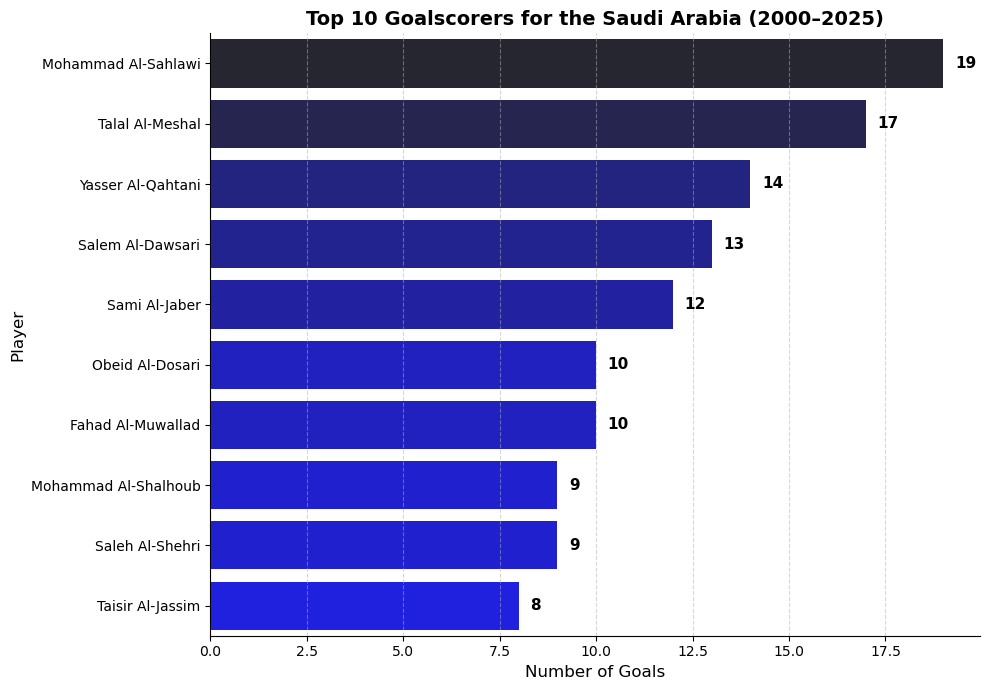

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 7))

# top 10 goal scorers for Saudi Arabia
sns.barplot(data=top_scorers,x='count',y='scorers_list',hue='count',palette='dark:b_r',legend=False)
plt.title('Top 10 Goalscorers for the Saudi Arabia (2000–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Goals', fontsize=12)
plt.ylabel('Player', fontsize=12)
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add goal count labels to each bar in the plot
for i,v in enumerate(top_scorers['count']):
    plt.text(v+0.3,i,v,va='center',fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()


<small>
From the above figure, we can conclude that Yasser Al-Qahtani, Mohammad Al-Sahalawi, and Salem Al-Dawsari are the top goalscorers in the 2000s.
</small>


In [19]:
df_recent.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_goals',
       'scorers_list', 'penalty_goals', 'own_goal', 'year'],
      dtype='object')

### 2. How has Saudi Arabia’s goal scoring changed over time (2000–2025)?

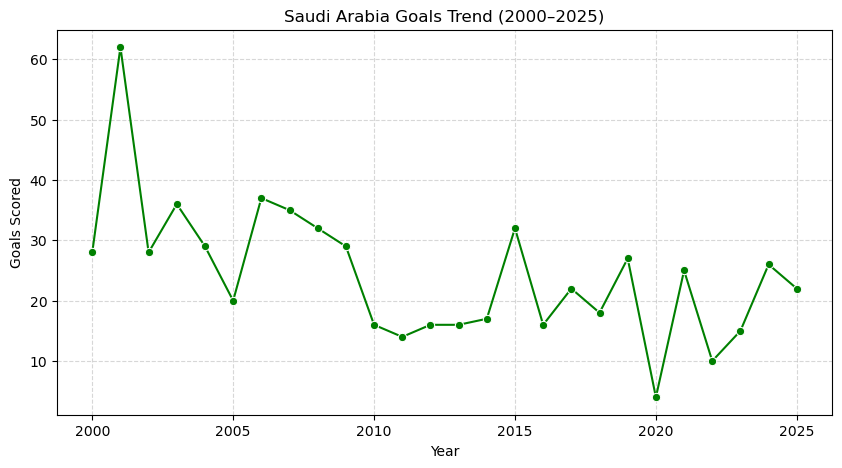

In [21]:
# Aggregate total Saudi goals by year
def saudi_goals(row):
    if row['home_team']== sa:
        return row['home_score']
    else:
        return row['away_score']
    
df_recent['saudi_goals']=df_recent.apply(saudi_goals,axis=1)


yearly_goals=df_recent.groupby('year')['saudi_goals'].sum().reset_index()
plt.figure(figsize=(10, 5))

# Plot yearly Saudi goals trend with markers
sns.lineplot(
    data=yearly_goals,
    x='year',
    y='saudi_goals',
    marker='o',
    color='green'
)
plt.title('Saudi Arabia Goals Trend (2000–2025)')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<small>From the figure,
Saudi Arabia's goal tally peaked sharply in the early 2000s, then showed a clear decline followed by relative stability with minor fluctuations since around 2010.
</small>

### 3. Which year did Saudi Arabia score the highest number of goals in international matches?

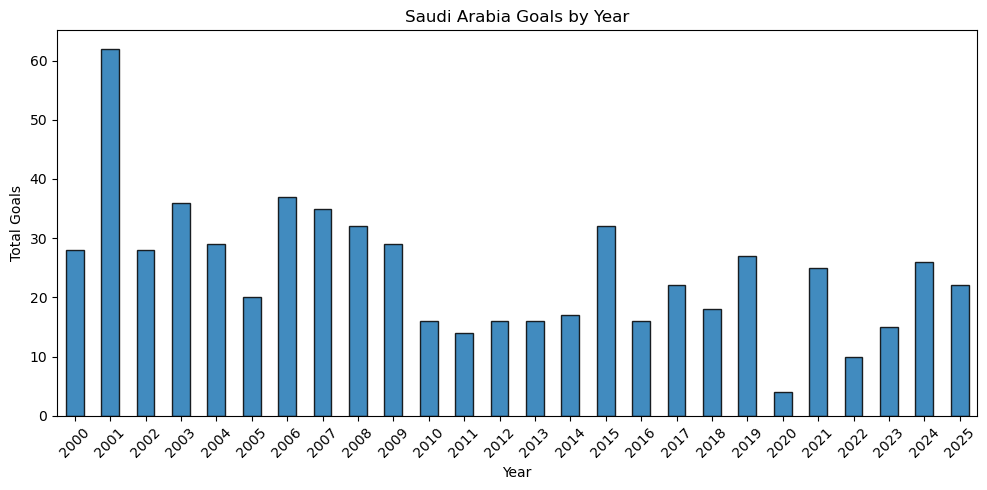

In [22]:
# Group the data by year and sum Saudi Arabia's goals for each year
yearly_goals=df_recent.groupby('year')['saudi_goals'].sum()


# Sort the yearly goals by year to prepare for plotting
yearly_goals_plot = yearly_goals.sort_index()

#plot
plt.figure(figsize=(10,5))
yearly_goals_plot.plot(
    kind='bar',
    color="#1f77b4",       
    edgecolor="black",
    alpha=0.85
)
plt.title("Saudi Arabia Goals by Year")
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<small>From the above figure, we can conclude that Saudi Arabia experienced a clear peak in goal-scoring performance in the early 2000s, followed by noticeable fluctuations over subsequent years, with periods of decline and partial recovery rather than a sustained upward trend.
</small>

### 4. In which tournaments did Saudi Arabia score the most goals?

In [23]:
# Calculate Saudi Arabia's goals for each match
def saudi_goals(row):
    if row['home_team'] == 'Saudi Arabia':
        return row['home_score']
    else:
        return row['away_score']

df_recent['saudi_goals'] = df_recent.apply(saudi_goals,axis=1)

# top 5 tournaments by total Saudi Arabia goals
tournament_goals = (
    df_recent.groupby('tournament')['saudi_goals']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .to_frame()
    .reset_index()
)

tournament_goals

,tournament,saudi_goals
0,FIFA World Cup qualification,211
1,Friendly,208
2,Gulf Cup,73
3,AFC Asian Cup qualification,61
4,AFC Asian Cup,43


C:\Users\HP\AppData\Local\Temp\ipykernel_9808\228900349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tournament_goals,x='saudi_goals',y='tournament',palette="dark:b")


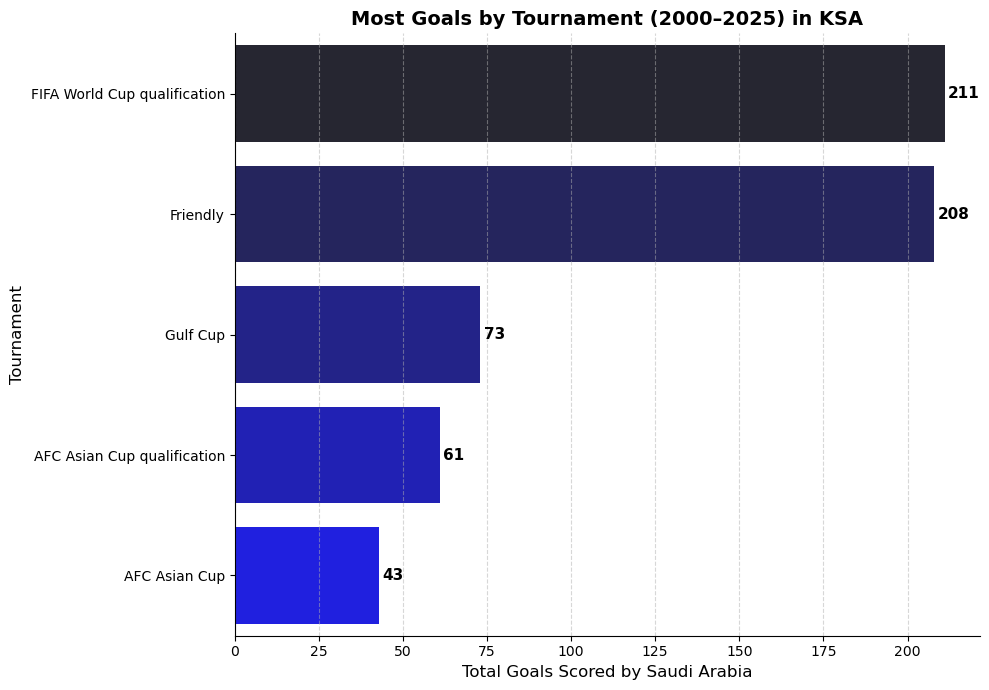

In [24]:
plt.figure(figsize=(10,7))

# Plot total Saudi goals by tournament
sns.barplot(data=tournament_goals,x='saudi_goals',y='tournament',palette="dark:b")
sns.despine()

# Add goal count labels to each tournament bar
for i,v in enumerate(tournament_goals['saudi_goals']):
    plt.text(v+1,i,v,va='center',fontweight='bold', fontsize=11)

plt.title('Most Goals by Tournament (2000–2025) in KSA', 
        fontsize=14, 
        fontweight='bold',
        loc='center')               
plt.xlabel('Total Goals Scored by Saudi Arabia',fontsize=12)
plt.ylabel('Tournament',fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<small>From the figure,
Saudi Arabia scores the most in World Cup qualifiers and friendlies, showing strength in both competitive high-stakes games and low-pressure matches.
This highlights reliance on qualifiers and friendlies for the bulk of attacking output.
</small>

<small>
</small>

### 5. What proportion of Saudi Arabia’s goals came from penalties?

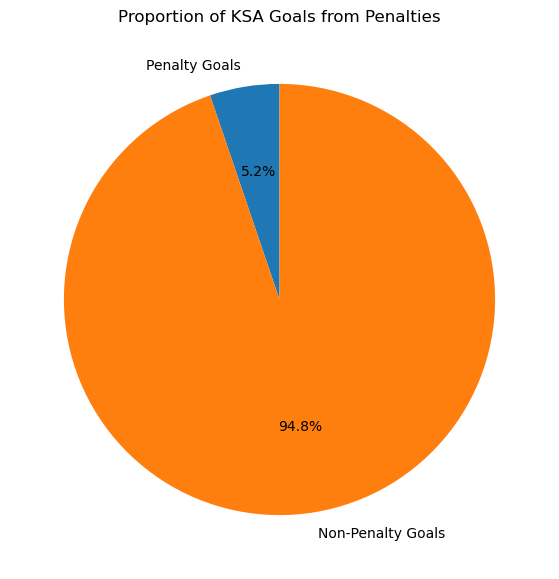

In [25]:
SA_matches=df_recent[
(df_recent['home_team']==sa )|
(df_recent['away_team'] == sa)
]


# Total penalty goals in Saudi Arabia matches
total_penalties = SA_matches['penalty_goals'].sum()

# calculates the total number of goals scored by Saudi Arabia
total_goals =SA_matches.apply(
lambda row:row['home_score'] if row['home_team']==sa else row['away_score'],
axis=1
).sum()

# Non-penalty goals
non_penalty_goals = total_goals - total_penalties

# Labels and values for plotting
labels= ['Penalty Goals', 'Non-Penalty Goals']
values=[total_penalties, non_penalty_goals]

plt.figure(figsize=(12,7))
plt.pie(values,labels=labels,autopct='%1.1f%%', startangle=90)
plt.title("Proportion of KSA Goals from Penalties", fontsize=12)
plt.show()

<small>From the above figure, we can conclude that the vast majority of Saudi Arabia’s goals in international matches come from open play rather than penalties, indicating that their scoring is largely driven by regular gameplay.
</small>

### 6. Which factors (penalties, own goals, total goals, and year) are most strongly related to Saudi Arabia’s goal scoring?

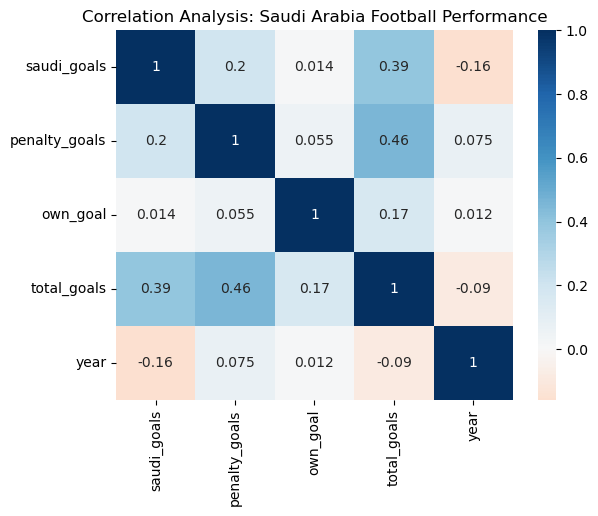

In [26]:
# Compute correlation matrix for key goal-related columns
cols=['saudi_goals','penalty_goals','own_goal','total_goals','year']
corr=df_recent[cols].corr()

sns.heatmap(corr, annot=True, cmap='RdBu', center=0)
plt.title("Correlation Analysis: Saudi Arabia Football Performance")
plt.show()


<small>From the figure,
Saudi goals correlate moderately with total goals, but weakly with own goals and slightly negatively with time (indicating gradual scoring decline).
</small>

### Chi-square test

In [24]:
from scipy.stats import chi2_contingency

# Create 'is_home' column
df_recent['is_home']= df_recent['home_team'] == 'Saudi Arabia'

# Create columns for  Saudi win
df_recent['saudi_win'] = (
    (df_recent['is_home'] & (df_recent['home_score'] > df_recent['away_score'])) |
    (~df_recent['is_home'] & (df_recent['away_score'] > df_recent['home_score']))
).astype(int)


# Create contingency table
table=pd.crosstab(df_recent['is_home'],df_recent['saudi_win'])

# Run Chi-Square test
chi2, p_value, dof, expected =chi2_contingency(table)

# Calculate win rate when playing at home and when playing away
home_rate = df_recent[df_recent['is_home']]['saudi_win'].mean()
away_rate = df_recent[~df_recent['is_home']]['saudi_win'].mean()

print(f"home_rate {home_rate:.2%}")
print(f"away_rate : {away_rate:.2%}")

# Set significance level for the hypothesis test
alpha = 0.05

# Decide whether to reject the null hypothesis based on p-value
decision = "Reject H₀" if p_value < alpha else "Fail to reject H₀"

print(f"p_value:{p_value:.4f}")
print("Decision:", decision)

home_rate 55.04%
away_rate : 38.73%
p_value:0.0015
Decision: Reject H₀


<small>From the analysis,
Saudi Arabia has a significantly higher win rate at home than away , and the Chi-square test (p=0.0015) confirms this home advantage is statistically significant.
This shows a clear and strong home-field effect in recent matches.
</small>